# Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average or X-day ma
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    Optimize: period, sma, stop loss percent, margin.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from talib.abstract import *

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)

Define Optimizations

In [4]:
# Pick one
optimize_period = False
optimize_sma    = True
optimize_pct    = False

# Define high low trade periods ranges
if optimize_period:
    Xs = range(2, 15, 1)
    Xs = [str(X) for X in Xs]

# Define SMAs ranges
elif optimize_sma:
    Xs = range(20, 210, 10)
    Xs = [str(X) for X in Xs]

# Define stop loss percentage ranges
elif optimize_pct:
    Xs = range(5, 31, 1)
    Xs = [str(X) for X in Xs]

In [5]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 1.0,
    'margin' : 1.0,
    'period' : 7,
    'sma' : 200,
    'use_regime_filter' : True
}

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_period:
        options['period'] = int(X)
    elif optimize_sma:
        options['sma'] = int(X)
    elif optimize_pct:
         options['stop_loss_pct'] = int(X)/100
        
    strategies[X] = strategy.Strategy(symbol, capital, start, end, options) 
    strategies[X].run()

20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'drawdown_recovery_period',
           'expected_shortfall',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200
annual_return_rate,8.28,8.56,8.53,8.33,8.74,8.59,8.59,8.10,7.55,7.80,7.68,7.46,7.33,7.37,7.59,7.48,7.48,7.48,7.45
max_closed_out_drawdown,-26.25,-20.68,-23.64,-21.97,-15.28,-14.01,-14.04,-14.01,-17.72,-19.05,-17.76,-17.76,-19.67,-18.91,-14.64,-14.64,-14.64,-14.64,-14.63
annualized_return_over_max_drawdown,0.32,0.41,0.36,0.38,0.57,0.61,0.61,0.58,0.43,0.41,0.43,0.42,0.37,0.39,0.52,0.51,0.51,0.51,0.51
drawdown_recovery_period,1448.00,509.00,509.00,574.00,928.00,123.00,123.00,326.00,743.00,1098.00,743.00,743.00,1113.00,1098.00,583.00,583.00,583.00,583.00,583.00
expected_shortfall,-8.37,-8.37,-8.37,-8.37,-6.89,-6.89,-6.89,-6.89,-7.35,-6.89,-6.89,-6.89,-6.89,-6.89,-7.25,-7.25,-7.25,-7.25,-7.25
best_month,12.84,12.90,12.90,12.90,12.89,12.89,12.88,12.88,12.90,12.90,12.90,12.90,12.90,12.90,12.90,12.90,12.90,12.90,12.88
worst_month,-14.28,-14.29,-14.25,-14.29,-13.54,-13.51,-13.54,-13.51,-13.51,-13.51,-13.53,-13.51,-13.53,-13.55,-13.52,-13.55,-13.55,-13.55,-13.54
sharpe_ratio,0.80,0.81,0.81,0.80,0.85,0.84,0.84,0.80,0.76,0.78,0.77,0.76,0.75,0.76,0.78,0.77,0.77,0.77,0.77
sortino_ratio,0.63,0.64,0.64,0.64,0.67,0.66,0.66,0.62,0.59,0.60,0.59,0.58,0.56,0.57,0.58,0.57,0.57,0.57,0.57
monthly_std,2.31,2.37,2.34,2.31,2.23,2.21,2.22,2.21,2.20,2.17,2.15,2.14,2.14,2.14,2.10,2.10,2.10,2.10,2.10


Bar graphs

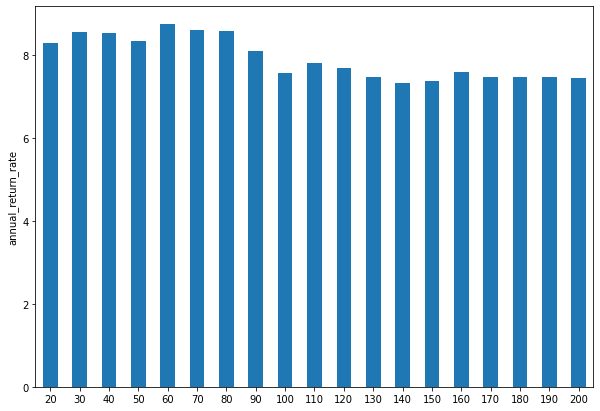

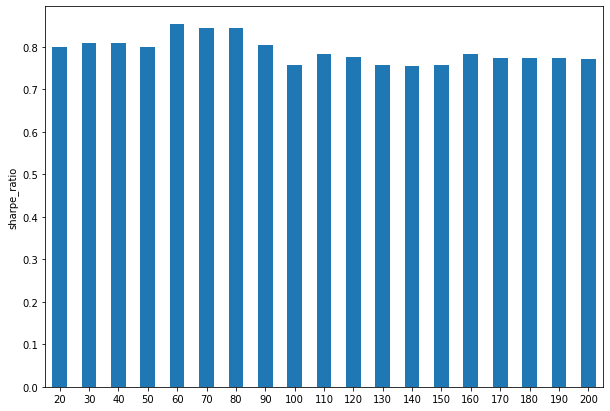

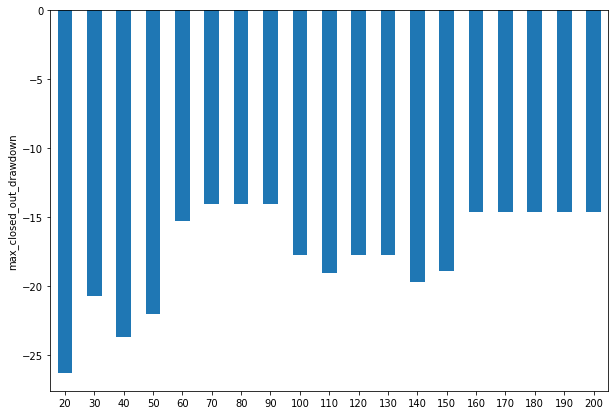

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()

Equity curve

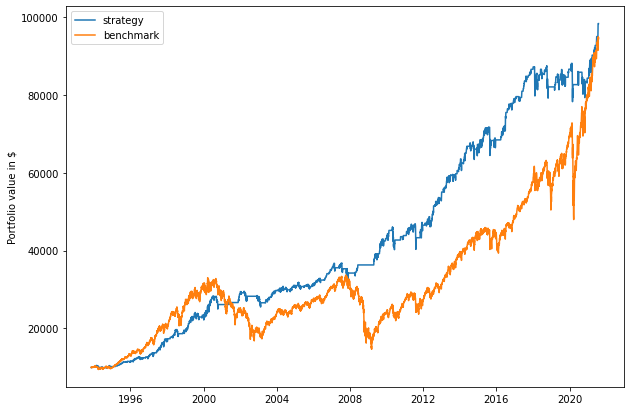

In [10]:
if   optimize_period: Y = '7'
elif optimize_sma:    Y = '70'
elif optimize_pct:    Y = '15'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

Compare parameter values.

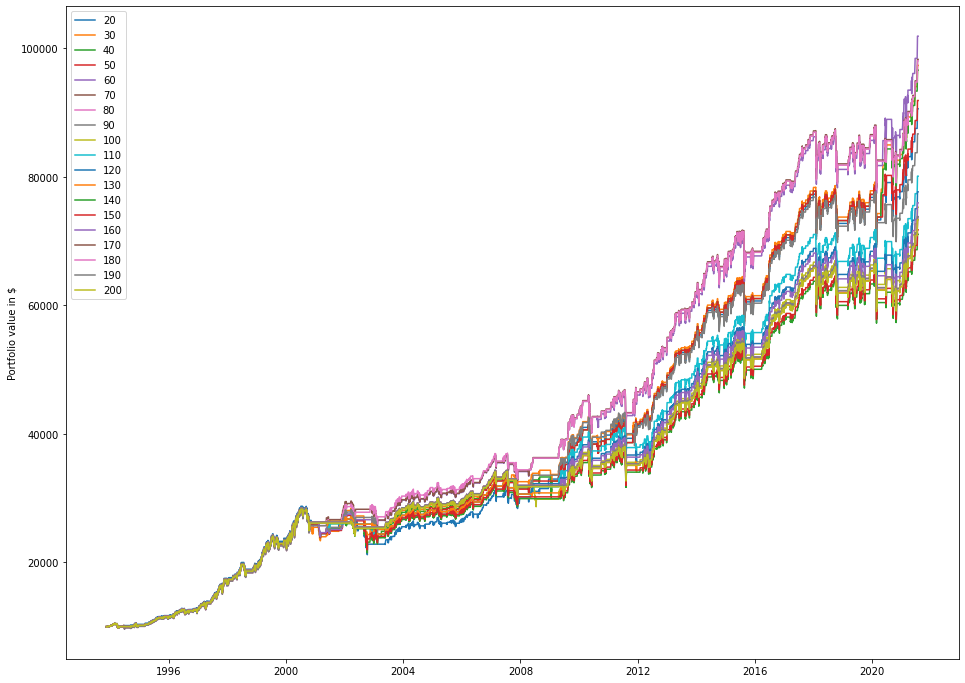

In [11]:
labels = []
for strategy in strategies:
    if optimize_period:
        label = strategy.options['period']
    elif optimize_sma:
        label = strategy.options['sma']
    elif optimize_pct:
        label = strategy.options['stop_loss_pct']
    labels.append(label)

pf.plot_equity_curves(strategies[:], labels)

Compare optimization with baseline vanilla values.

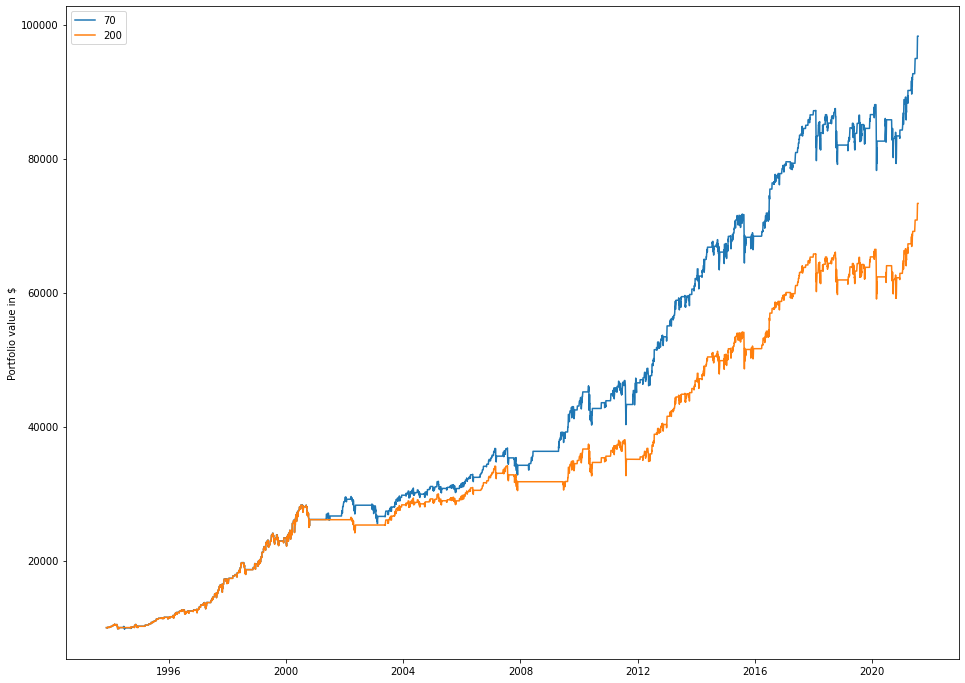

In [12]:
index = None
if optimize_period:
    index = ['6', '7']
elif optimize_sma:
    index = ['70', '200']
elif optimize_pct:
    index = ['1.0', '0.15']

pf.plot_equity_curves(strategies[index], labels=index)